### Check dredFISH Data

In [5]:
from dredFISH.Processing.Section import *
metadata_path = '/bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'dredfish_processing_config'
config = importlib.import_module(cword_config)
results_path = os.path.join(metadata_path,config.parameters['results'])
out_path = config.parameters['outpath']
section = 'Section_2910X_2910Y'
self = Section_Class(metadata_path,dataset,section,cword_config,verbose=True)
self.config.parameters['fishdata'] = 'fishdata'
self.load_data()

/home/zach/miniconda3/envs/dredfish_3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

11:14:43 Loading Data: 0it [00:00, ?it/s]
11:14:43 Loading Metadata: 0it [00:00, ?it/s]


11:15:14 Stitching Images: 0it [00:00, ?it/s]
Generate Images nucstain_3_DeepBlue: 100%|██████████| 54/54 [01:04<00:00,  1.20s/it]
11:16:37 Downsampling Stitched: 0it [00:00, ?it/s]
11:16:57 Saving Stitched: 0it [00:00, ?it/s]


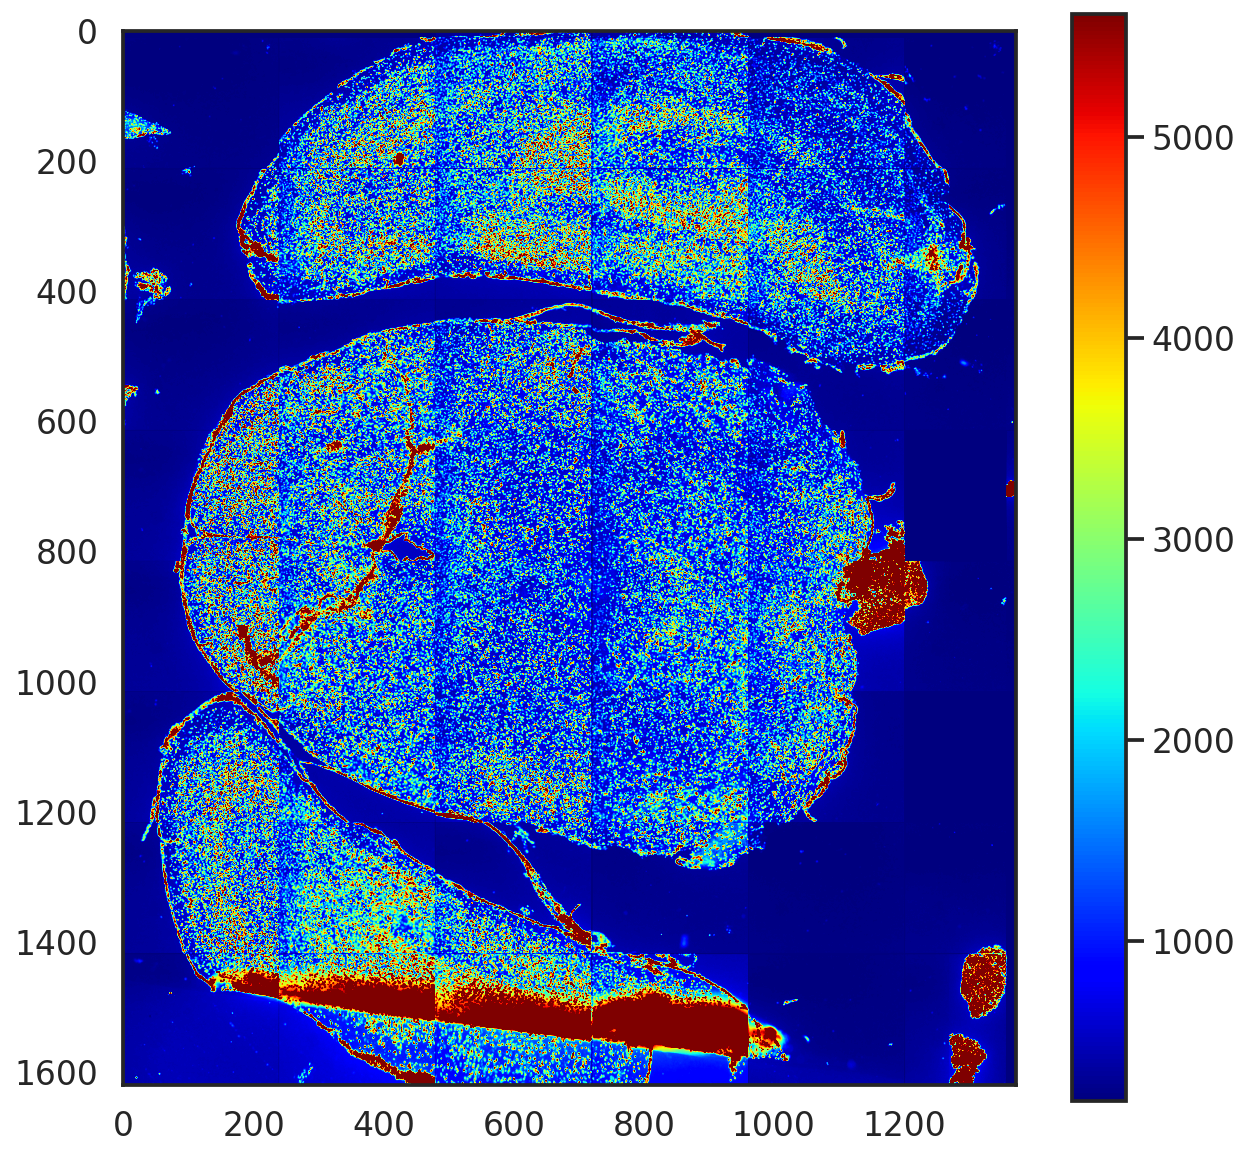

In [7]:
img = self.generate_stitched('nucstain_3','DeepBlue')
s = img[img>0].ravel()
vmin,vmax = np.percentile(s,[5,95])
temp_img = img.copy()
dim1_mask = temp_img.mean(0)>vmin
dim2_mask = temp_img.mean(1)>vmin
temp_img = temp_img[:,dim1_mask]
temp_img = temp_img[dim2_mask,:]
plt.figure(figsize=[10,10])
plt.imshow(temp_img,vmin=vmin,vmax=vmax,cmap='jet')
plt.colorbar()
plt.show()

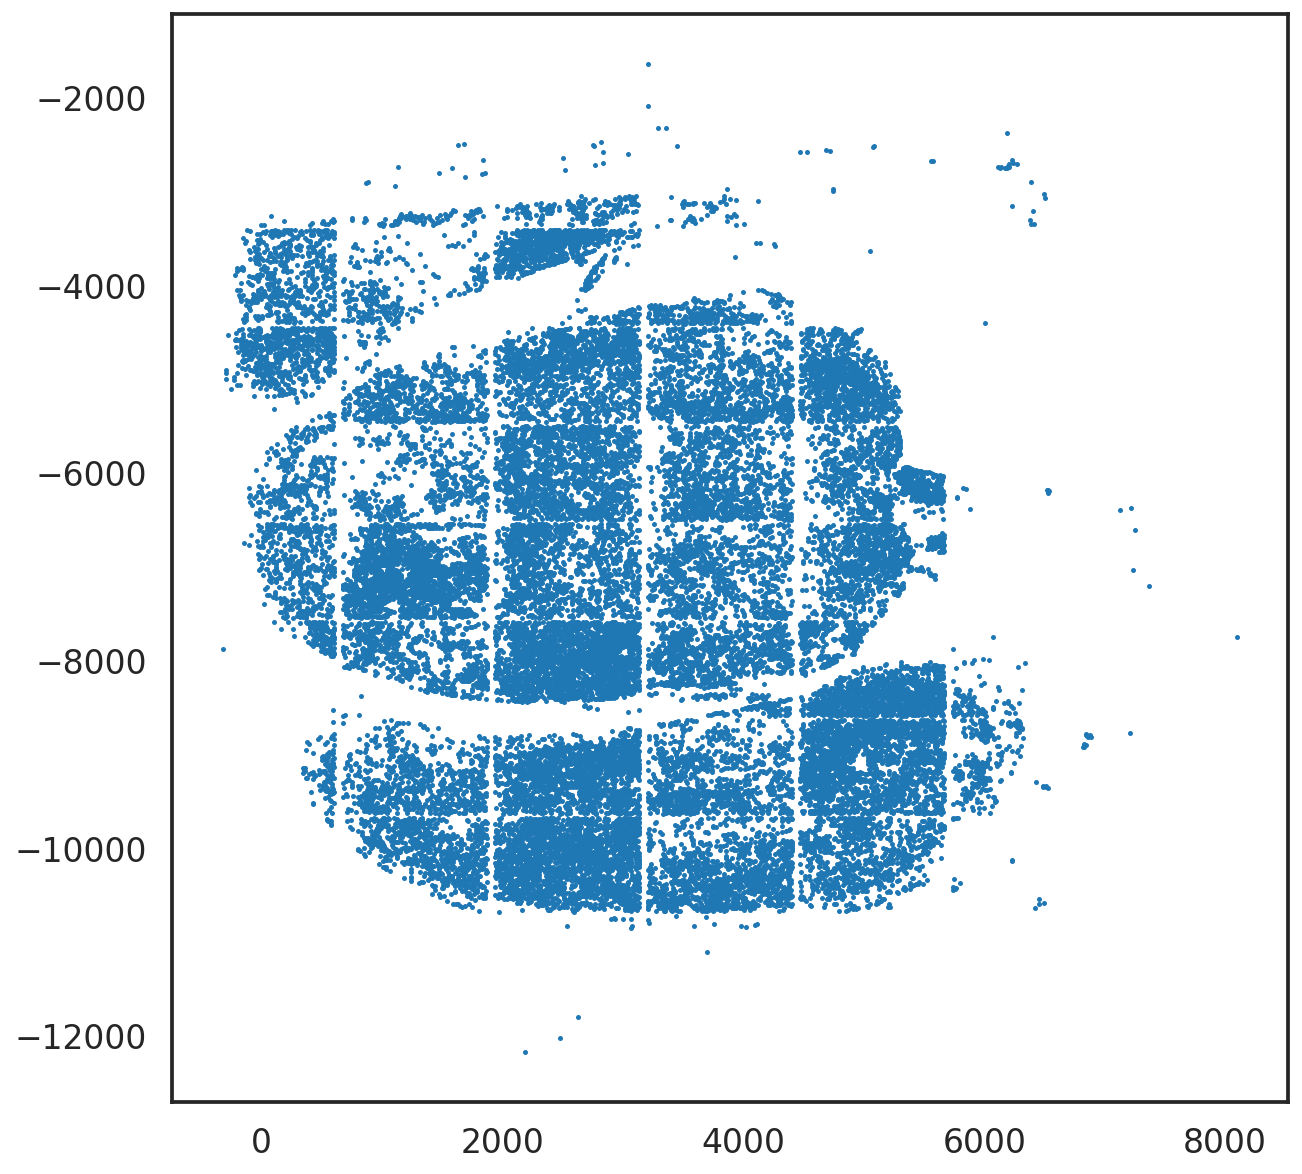

In [9]:
import matplotlib.pyplot as plt 
plt.figure(figsize=[10,10])
plt.scatter(self.data.obs['stage_x'],self.data.obs['stage_y'],s=1)
plt.show()

### Remove Outliers

In [1]:
from dredFISH.Processing.Section import *
import matplotlib.pyplot as plt 
import torch
metadata_path = '/bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'dredfish_processing_config'
config = importlib.import_module(cword_config)
results_path = os.path.join(metadata_path,config.parameters['results'])
out_path = config.parameters['outpath']
section = 'Section_2910X_2910Y'
self = Section_Class(metadata_path,dataset,section,cword_config,verbose=True)
self.config.parameters['fishdata'] = 'fishdata'
self.load_data()

/home/zach/miniconda3/envs/dredfish_3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:09:45 Loading Metadata: 0it [00:00, ?it/s]
16:09:48 Loading Data: 0it [00:00, ?it/s]


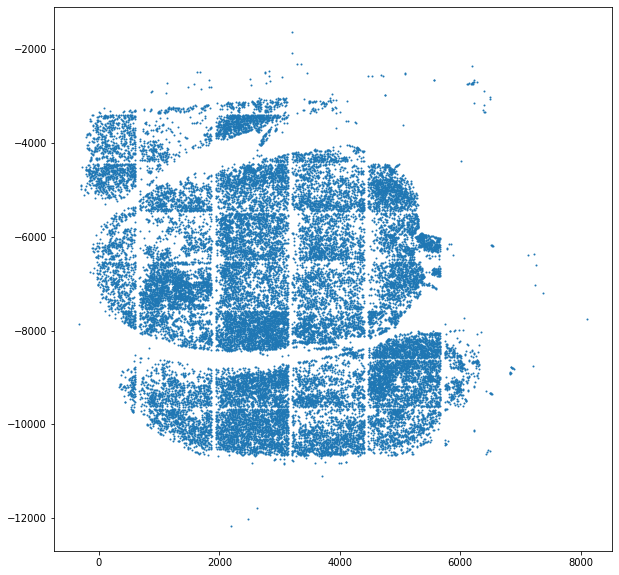

In [2]:
plt.figure(figsize=[10,10])
plt.scatter(self.data.obs['stage_x'],self.data.obs['stage_y'],s=1)
plt.show()

In [3]:
XY = torch.tensor(self.data.obsm['stage'].copy())
center = torch.median(XY,axis=0).values
distances = torch.cdist(XY,center[:,None].T).numpy()
thresh = np.percentile(distances,99)
mask = distances<thresh
self.data = self.data[mask]

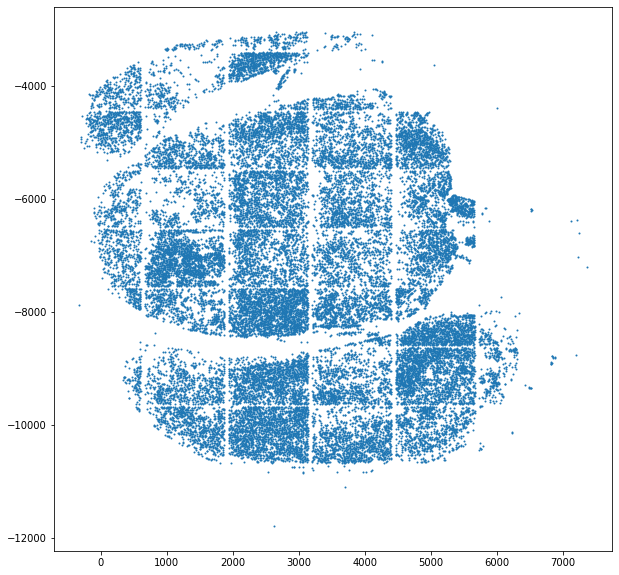

In [4]:
plt.figure(figsize=[10,10])
plt.scatter(self.data.obs['stage_x'],self.data.obs['stage_y'],s=1)
plt.show()

### Check Registration

In [1]:
""" Check Reference Registration """
from dredFISH.Analysis import regu
import importlib
importlib.reload(regu)
import nrrd
# allen data
allen_template_path='/bigstore/binfo/mouse/Brain/average_template.npy'
allen_tree_path='/bigstore/GeneralStorage/fangming/reference/allen_ccf/structures.json'
allen_annot_path='/bigstore/GeneralStorage/fangming/reference/allen_ccf/annotation_10.nrrd'

# dredFISH data
dataset = 'DPNMF_PolyA_2021Nov19' # dataset tag
base_path = '/bigstore/Images2021/gaby/dredFISH/DPNMF_PolyA_2021Nov19/'
fish_path = f'{base_path}fishdata_2022Mar23/' # Zach's new version
anndata_path = f'{base_path}results/raw_fishdata_Mar30.h5ad'

allen_template = regu.load_allen_template(allen_template_path)
allen_tree, allen_maps = regu.load_allen_tree(allen_tree_path)
allen_annot = regu.load_allen_annot(allen_annot_path) # takes about 30 seconds


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
rows = 10
columns = 10
fig, axs = plt.subplots(columns,rows,figsize=[25,22],)
nbins = columns*rows
bins = np.linspace(10,allen_template.shape[0]-10,nbins).astype(int)
i = 0
for ax in axs.ravel():
    bin = bins[i]
    img = allen_template[bin,:,:]
    if img.max()==0:
        continue
    vmin,vmax=np.percentile(img[img>0].ravel(),[5,95])
    ax.imshow(img,vmin=vmin,vmax=vmax,cmap='jet')
    ax.set_title(bin)
    ax.set_axis_off()
    i+=1
plt.subplots_adjust(wspace=0, 
                    hspace=0.1)

In [2]:
from dredFISH.Processing.Section import *
metadata_path = '/bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]
cword_config = 'dredfish_processing_config'
config = importlib.import_module(cword_config)
results_path = os.path.join(metadata_path,config.parameters['results'])
out_path = config.parameters['outpath']
section = 'Section_2910X_2910Y'
self = Section_Class(metadata_path,dataset,section,cword_config,verbose=True)
self.config.parameters['fishdata'] = 'fishdata'
self.load_h5ad()
self.remove_outliers()

/home/zach/miniconda3/envs/dredfish_3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

16:17:32 Loading Data: 0it [00:00, ?it/s]
16:17:32 Removing Outliers: 0it [00:00, ?it/s]


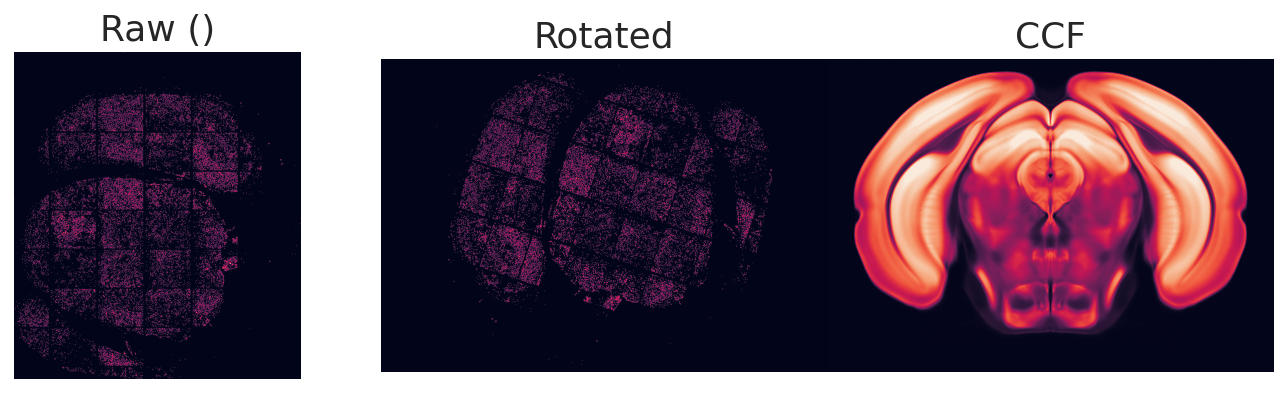

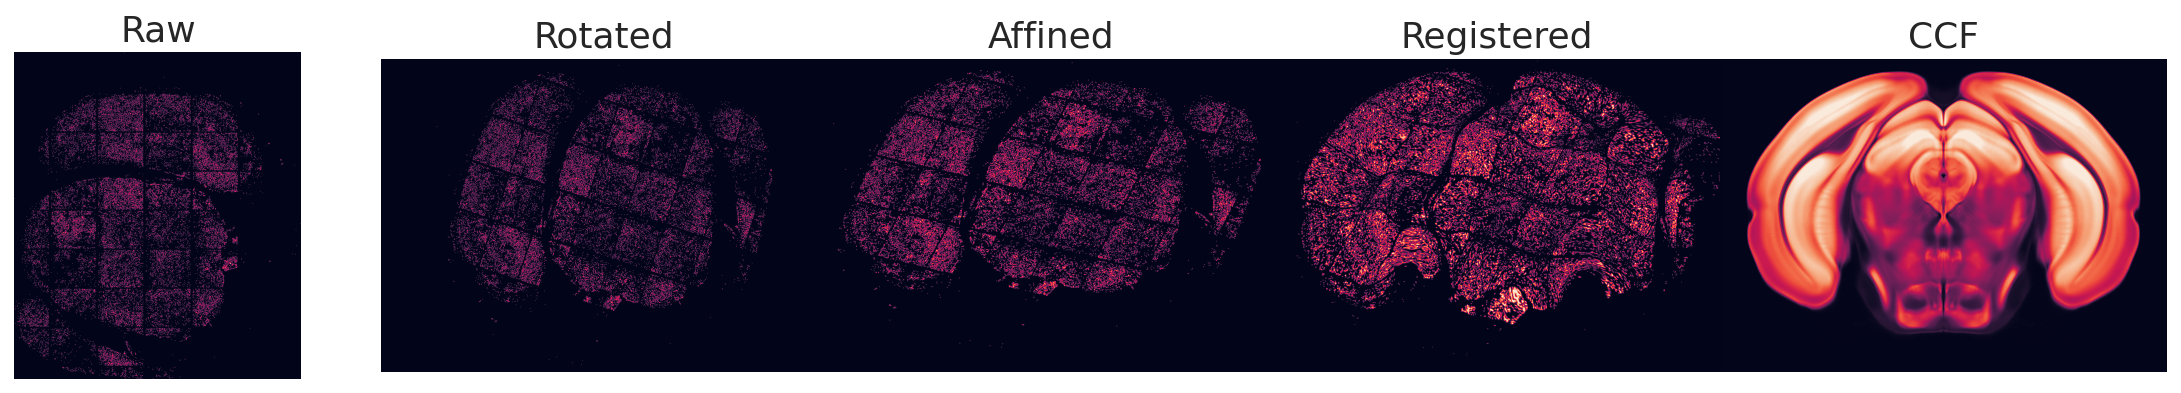

saved to registered.hdf5


In [3]:
idx_ccf = 916
flip = False
outprefix=''
force=False
""" Preview"""
spatial_data = regu.check_run(self.data.obsm['stage'].copy(), 
                                allen_template, 
                                allen_annot, 
                                allen_maps,
                                idx_ccf, 
                                flip=flip)
""" Full """
spatial_data = regu.real_run(self.data.obsm['stage'].copy(), 
                                allen_template, 
                                allen_annot, 
                                allen_maps,
                                idx_ccf, 
                                flip=flip,
                dataset="", # a name
                outprefix=outprefix, 
                force=force,
                )

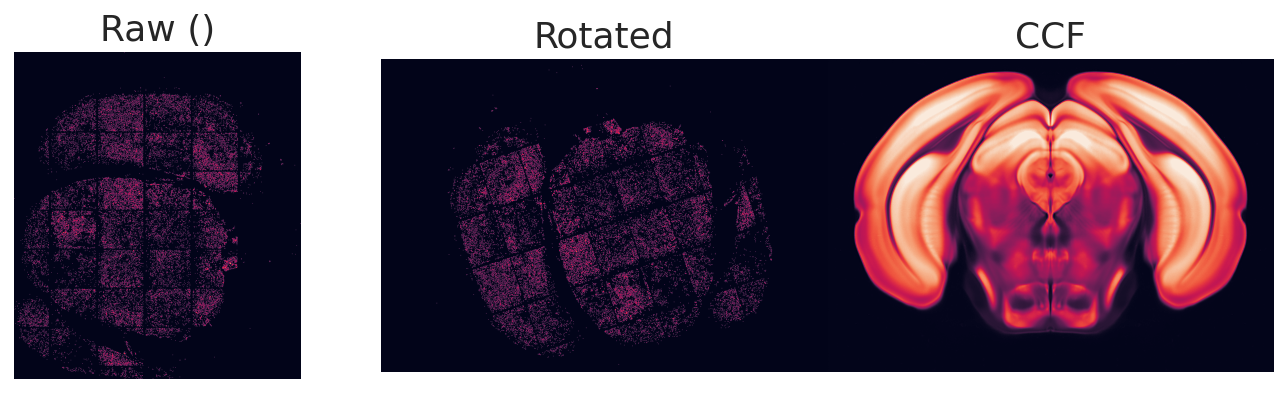

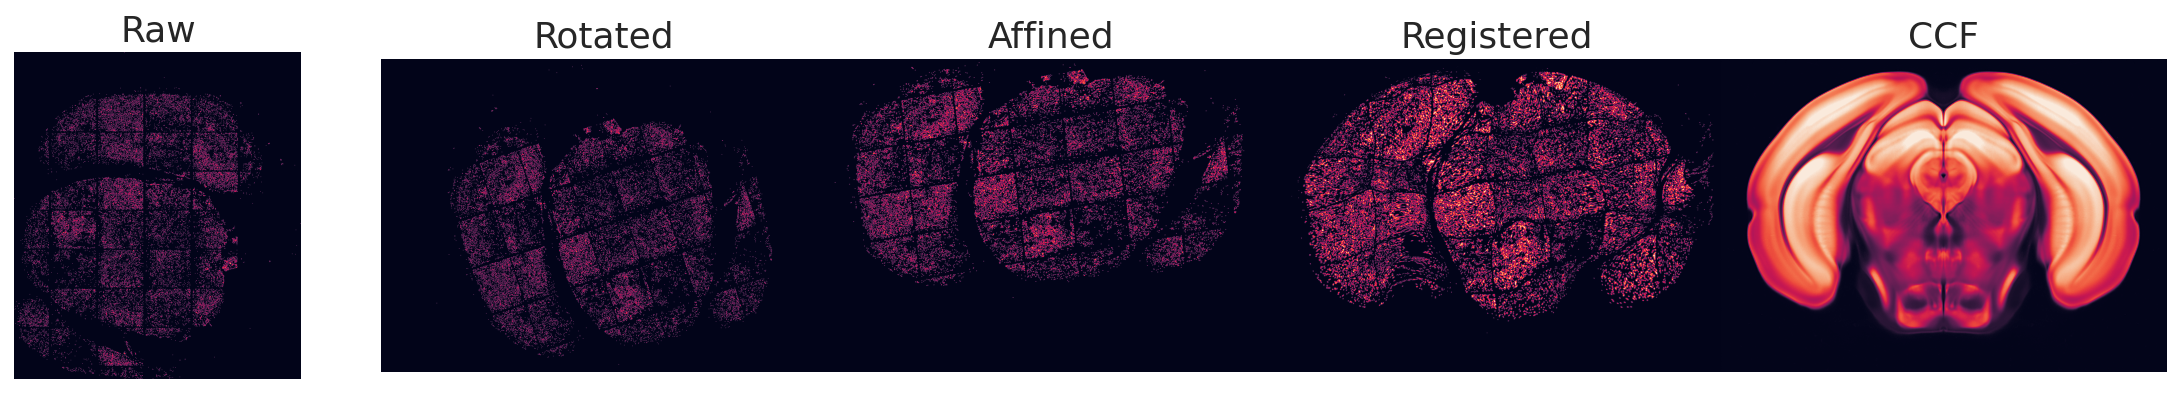

AssertionError: 

In [4]:
idx_ccf = 916
flip = True
outprefix=''
force=False
""" Preview"""
spatial_data = regu.check_run(self.data.obsm['stage'].copy(), 
                                allen_template, 
                                allen_annot, 
                                allen_maps,
                                idx_ccf, 
                                flip=flip)
""" Full """
spatial_data = regu.real_run(self.data.obsm['stage'].copy(), 
                                allen_template, 
                                allen_annot, 
                                allen_maps,
                                idx_ccf, 
                                flip=flip,
                dataset="", # a name
                outprefix=outprefix, 
                force=force,
                )